<a href="https://colab.research.google.com/github/Lkogus/estudo_biblioteca_pandas/blob/main/Vendas%20Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns



In [6]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [8]:
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


In [9]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP','Aplicativo')

In [10]:
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [11]:
vendas.groupby("bandeira").idcompra.nunique()

,idcompra
bandeira,
A,27679
B,38483


In [12]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [13]:
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [14]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ','_')

In [15]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [16]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [17]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [18]:
vendas['estado'].fillna('MS',inplace=True)

In [19]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [20]:
media = vendas['Preço'].mean()

vendas.fillna(media,inplace=True)

In [21]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [22]:
vendas[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [23]:
preco_errado = vendas.query('Preço > Preço_com_frete')

vendas_correto = vendas.query('Preço < Preço_com_frete')

In [24]:
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [25]:
vendas_correto.query('Nome_Departamento == "Esporte_e_Lazer" and estado == "SP"').describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [26]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [27]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

,idcompra
Nome_Departamento,
Bebes,4353
Eletrodomesticos,4201
Eletroportateis,2223
Moveis,2036
Utilidades_Domesticas,1366
Acessorios_e_Inovacoes,1243
Beleza_e_Saude,1054
Brinquedos,686
Perfumaria,563


In [28]:
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg('mean').sort_values(ascending = False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [29]:
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending = False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [30]:
vendas_correto['mes'] = vendas_correto['Data'].dt.month

<ipython-input-30-b8f36b7b5813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['mes'] = vendas_correto['Data'].dt.month


In [64]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [32]:
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending = False).reset_index()

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [34]:
clientes = pd.read_excel('/content/cliente_varejo.xlsx')

In [35]:
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [36]:
clientes[['idade','renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [54]:
clientes_venda = vendas_correto.merge(clientes, how = 'left', on='cliente_Log')

In [55]:
agg_bandeira_idade= clientes_venda.groupby('bandeira').agg({'idade':'mean'}).reset_index()
agg_bandeira_idade

,bandeira,idade
0,A,53.303003
1,B,53.287576


In [56]:
agg_bandeira_idade = agg_bandeira_idade.sort_values('idade',ascending = False)
agg_bandeira_idade

,bandeira,idade
0,A,53.303003
1,B,53.287576


In [57]:
agg_idcanal_renda = clientes_venda.groupby('idcanalvenda').agg({'renda':'mean'}).reset_index()
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.851376
1,Internet,8211.844949
2,Mobile,8222.717801


In [41]:
!pip install matplotlib
import matplotlib.pyplot as plt

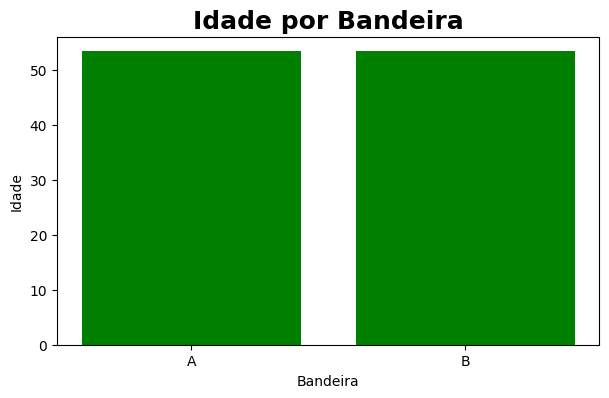

In [42]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_bandeira_idade['bandeira'],agg_bandeira_idade['idade'],color = 'green')

plt.ylabel('Idade')
plt.xlabel('Bandeira')
plt.title('Idade por Bandeira',loc = 'center',fontsize = 18,fontweight = 'bold',color = 'black');

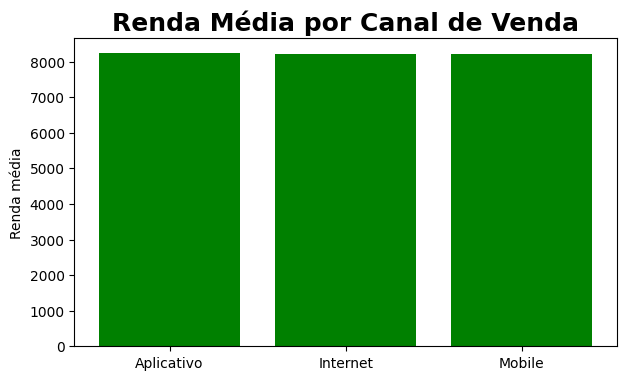

In [61]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda['idcanalvenda'],agg_idcanal_renda['renda'],color = 'green')

plt.ylabel('Renda média')
plt.title('Renda Média por Canal de Venda',loc='center',fontsize = 18,fontweight = 'bold',color = 'black');


In [69]:
vendas_por_data = vendas_correto.groupby('Data').idcompra.nunique().reset_index()

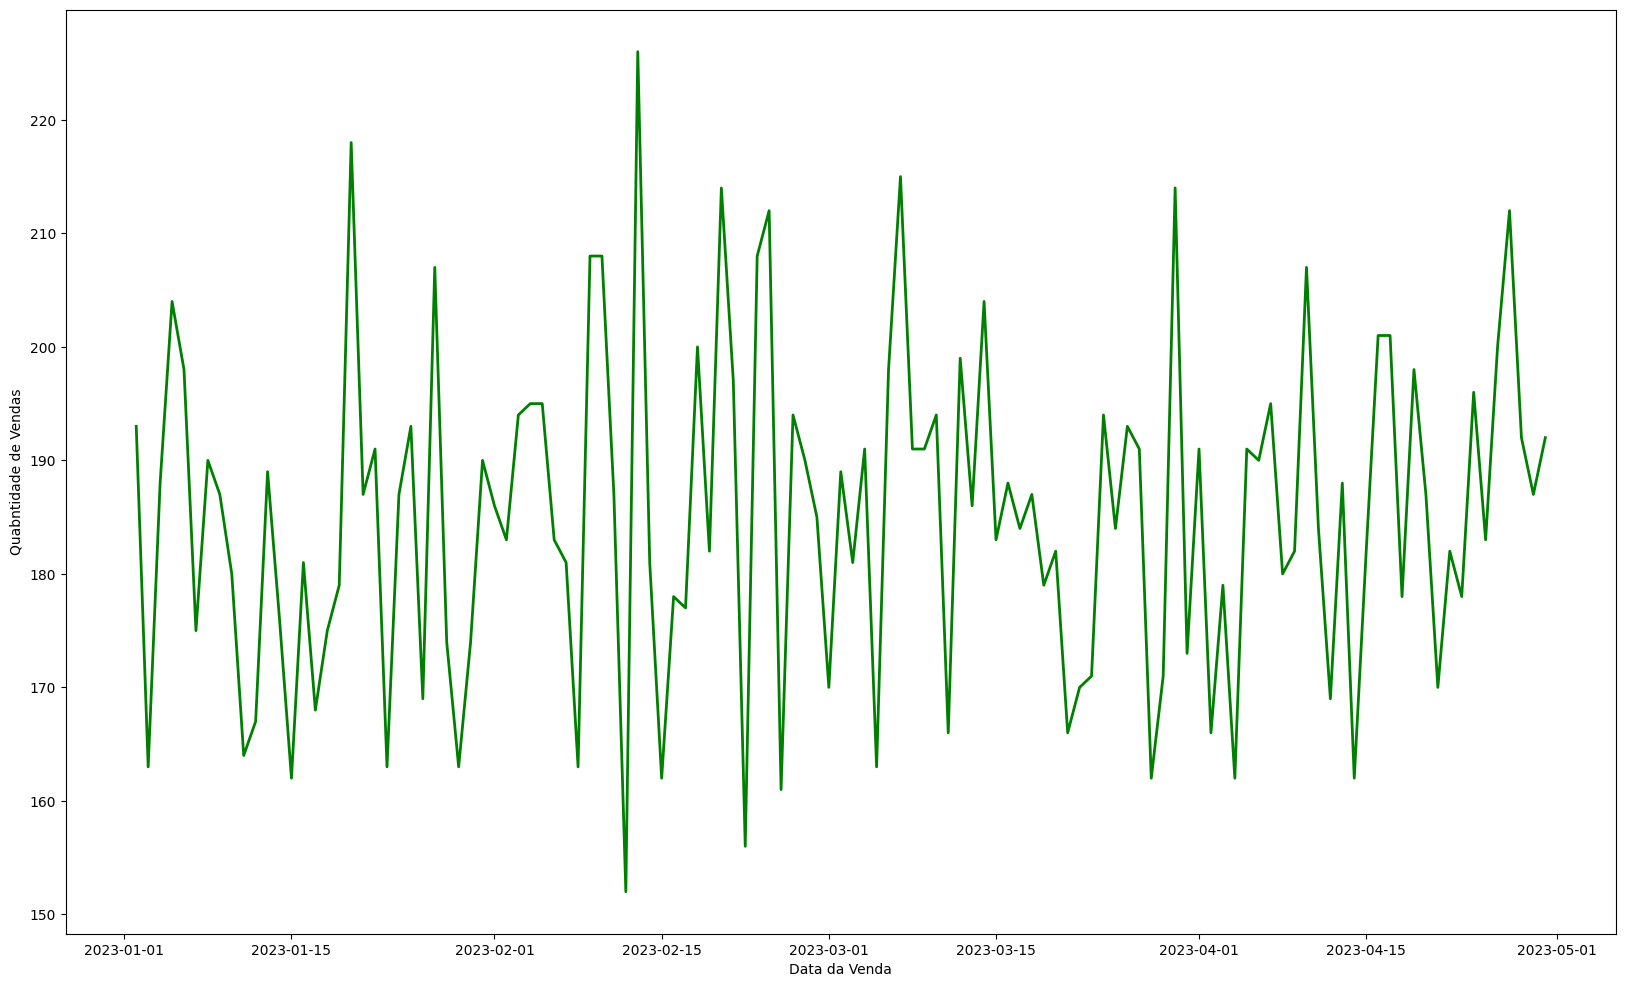

In [74]:
fig = plt.figure(figsize=(20,12))

plt.xlabel('Data da Venda')
plt.ylabel('Quabntidade de Vendas')
x = vendas_por_data['Data']
y = vendas_por_data['idcompra']

plt.plot(x,y,color = 'green', linewidth = 2)
plt.show();

In [75]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.4 MB/s eta 0:00:00


In [76]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [79]:
px.bar(agg_bandeira_idade,x = 'bandeira',y='idade')

In [80]:
px.line(vendas_por_data,x='Data',y='idcompra')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

